# Project: cleanning - [candy data]
### this notebook is for educational purpose . in this notebook we will do some cleanning

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">wrangling</a></li>
  
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> i will go through candy data 2017 , this data has :
- Internal_ID
- Q1-Going Out?: Are you actually going trick or treating yourself? "has values `Yes or No`"
- Q2-Gender: It has four different options, `Femal ,Male ,Other ,I'd rather not say`
- Q3-Age: Numerical field
- Q4-Country: Text Field, but users have written their own version of the names. Example, for America, there are entries such as USA, us, US, America so we should consider that while cleanning
- Q5-State/Province: Text Field, but users have written their own version of the names. Same as the country data.
- Q6-Joy Or Despair: All kinds of chocolate bars are the questions with three distinct options to choose from (Joy, Meh, Despair).
- Q7-Joy Other: Text Field to write items not included above that give you JOY. Lots of missing values.
- Q8-Despair Other: Text Field ti write items not included above that give you DESPAIR. Lots of missing values.
- Q9-Other Comments: Text Field. Lots of missing values.
- Q10-Dress: Binary field. Missing values present
- Unnamed: 113
- Q11-Day: Binary Answer Field. Missing values present


# 1- import packages and load data

In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
import warnings 
warnings.simplefilter('ignore')
from fuzzywuzzy import process

In [157]:
df = pd.read_excel('candyhierarchy2017.xlsx')

In [158]:
pd.set_option('display.max_column', 150)
pd.set_option('display.max_row',None)

In [159]:
df.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,Na

In [160]:
df.shape

(2460, 120)

<a id='wrangling'></a>
## Data Wrangling



### General Properties

# 2- show some general properties for the data 

In [161]:
df.describe()

,Internal ID,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo]
count,2.460000e+03,85.0,1362.0,99.0,67.0
mean,9.028016e+07,1.0,1.0,1.0,1.0
std,7.435532e+03,0.0,0.0,0.0,0.0
min,9.025877e+07,1.0,1.0,1.0,1.0
25%,9.027520e+07,1.0,1.0,1.0,1.0
50%,9.027780e+07,1.0,1.0,1.0,1.0
75%,9.028242e+07,1.0,1.0,1.0,1.0
max,9.031480e+07,1.0,1.0,1.0,1.0


In [162]:
df.describe(include='object')

,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,"Click Coordinates (x, y)"
count,2350,2419,2376,2396,2360,1713,1726,1788,1502,1468,1454,1695,1772,1754,1778,1777,1782,1769,1708,1780,1717,1514,1749,1607,1756,1768,1731,1758,1637,1729,1763,1581,1726,1744,1763,1765,1766,1748,1787,1788,1782,1747,1766,1765,1434,1762,1518,1716,1515,1786,1724,1730,1774,1775,1742,1769,1735,1436,1731,1767,1772,1785,1789,1733,1731,1696,1647,1518,1736,1684,1649,1720,1716,1737,1762,1643,1750,1751,1738,1707,1781,1769,1446,1746,1684,1754,1735,1559,1770,1722,1578,1767,1752,1745,1458,1543,1746,1724,1752,1754,1752,1770,1668,1671,1637,1703,1713,1755,911,717,386,1716,9,1735,1605
unique,2,4,106,128,511,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,867,685,385,2,1,2,952
top,No,Male,40,USA,California,JOY,DESPAIR,JOY,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,DESPAIR,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,DESPAIR,MEH,MEH,JOY,JOY,DESPAIR,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,JOY,JOY,MEH,JOY,DESPAIR,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,JOY,JOY,DESPAIR,MEH,DESPAIR

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Columns: 120 entries, Internal ID to Click Coordinates (x, y)
dtypes: float64(4), int64(1), object(115)
memory usage: 2.3+ MB


In [164]:
df.duplicated().sum()

0

In [165]:
(df.isna().sum() / len(df) )*100

Internal ID                                                                                0.000000
Q1: GOING OUT?                                                                             4.471545
Q2: GENDER                                                                                 1.666667
Q3: AGE                                                                                    3.414634
Q4: COUNTRY                                                                                2.601626
Q5: STATE, PROVINCE, COUNTY, ETC                                                           4.065041
Q6 | 100 Grand Bar                                                                        30.365854
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)    29.837398
Q6 | Any full-sized candy bar                                                             27.317073
Q6 | Black Jacks                                                                          38.943089


# 3- write summary about what you get form the above functions
> #### tips : this summary can be about : if there is any missing values , if there a wrong data type , if there a wrong range of values , ....

### Summary of Findings

1. **Duplicates**:
   - There may be no duplicate rows present in the dataset that need to be identified and removed.
  
2. **Unnecessary Columns**:
   - `Internal ID`, `Click Coordinates (x, y)`, `Unnamed: 113` , `Q9: OTHER COMMENTS` and columns for media
      seem to be unnecessary for the analysis and can be dropped to simplify the dataset.
  
3. **Null and missing values**:
   - There are some columns have alot of nan we will clean it 
4. **Converting columns to true data type**:
   - There are columns like `age` we ned to convert it to float instead object

# cleaning

### 4- drop all the useless columns and  rows with too much NaN , 
> tip : useless columns can be like `Internal ID`and can be also columns with too much NaN 
- rename columns for easy access

In [166]:
df.drop(columns=['Internal ID', 'Click Coordinates (x, y)', 'Q9: OTHER COMMENTS', 'Unnamed: 113', 'Q12: MEDIA [Daily Dish]', 'Q12: MEDIA [Science]', 'Q12: MEDIA [ESPN]', 'Q12: MEDIA [Yahoo]'], 
                    inplace=True)

In [167]:
df.head()

,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q10: DRESS,Q11: DAY
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,White and gold,Sunday
2,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [168]:
df = df.rename(columns={
    'Q1: GOING OUT?' : 'going out',
    'Q2: GENDER' : 'gender',
    'Q3: AGE' : 'age',
    'Q4: COUNTRY' : 'country',
    'Q5: STATE, PROVINCE, COUNTY, ETC' : 'state',
    'Q10: DRESS' : 'dress',
    'Q7: JOY OTHER' : 'jpy other' ,
    'Q8: DESPAIR OTHER' : 'despair other',
    'Q11: DAY' : 'day'
})


In [169]:
df.head()

,going out,gender,age,country,state,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,jpy other,despair other,dress,day
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,White and gold,Sunday
2,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### 5 - clean `going out` column 
> tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [170]:
df['going out'].value_counts()

going out
No     2038
Yes     312
Name: count, dtype: int64

In [171]:
(df['going out'].isna().sum() / len(df) ) *100

4.471544715447155

In [172]:
df['going out'].fillna('No', inplace=True)

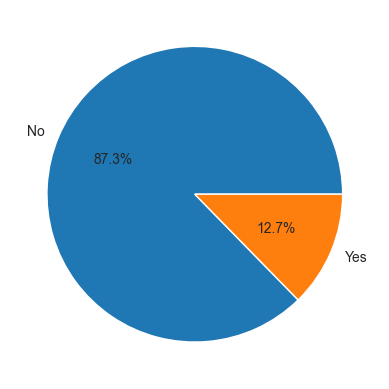

In [173]:
plt.pie(df['going out'].value_counts(),labels= df['going out'].value_counts().index, autopct= '%1.1f%%')
plt.show()

### 6 - clean ` gender` column 
> tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [174]:
df['gender'].value_counts()

gender
Male                  1467
Female                 839
I'd rather not say      83
Other                   30
Name: count, dtype: int64

In [175]:
df['gender'].isna().sum()

41

In [176]:
df["gender"].fillna('I\'d rather not say',inplace=True)

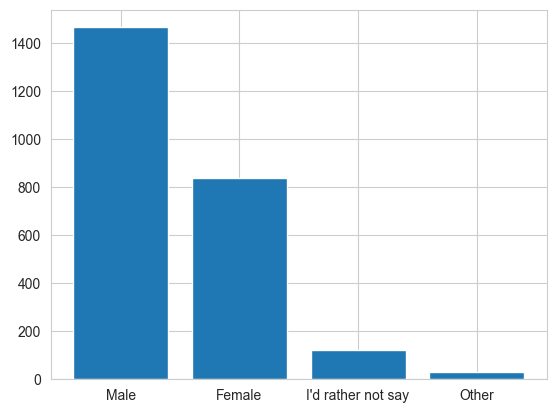

In [177]:
plt.bar(df['gender'].value_counts().index,
        df['gender'].value_counts().values)
plt.show()

### 7 - clean ` age` column 
> tip : note the type of age column , and NaN values
 - try to use `to_numeric` 
 - tip : you should choose which best value to put in place of these NaNs ( mean, median, ....etc)

In [178]:
df['age'].unique()

array([nan, 44, 49, 40, 23, 53, 33, 43, 56, 64, 37, 59, 48, 54, 36, 45,
       25, 34, 35, 38, 58, 50, 47, 16, 52, 63, 65, 41, 27, 31, 61, 46, 42,
       62, 29, 39, 32, 28, 69, 67, 30, 22, 26, 51, 70, 24, 18, 19,
       'Old enough', 57, 60, 66, 12, 'Many', 55, 72, '?', 21, 11, 'no', 9,
       68, 20, 6, 10, 71, 90, 13, '45-55', 312, 99, 7, 'hahahahaha', 88,
       39.4, 74, 102, 'older than dirt', 17, 15, 8, 75, '5u', 'Enough',
       'See question 2', '24-50', 14, 'Over 50', 100, 76, 1000,
       'sixty-nine', '46 Halloweens.', 'ancient', 77, 'OLD', 'old', 73,
       70.5, 1, 'MY NAME JEFF', 4, '59 on the day after Halloween',
       'old enough', 'your mom',
       'I can remember when Java was a cool new language', '60+'],
      dtype=object)

In [179]:
df['age'].isna().sum()

84

In [180]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')

<Axes: ylabel='age'>

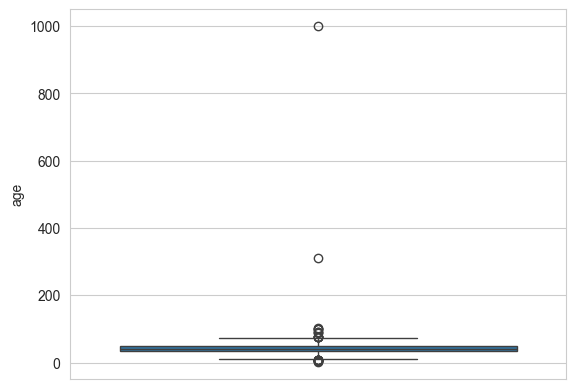

In [181]:
sns.boxplot(df['age'])

In [182]:
df.loc[df['age'] > 90, 'age'] = np.nan 

<Axes: ylabel='age'>

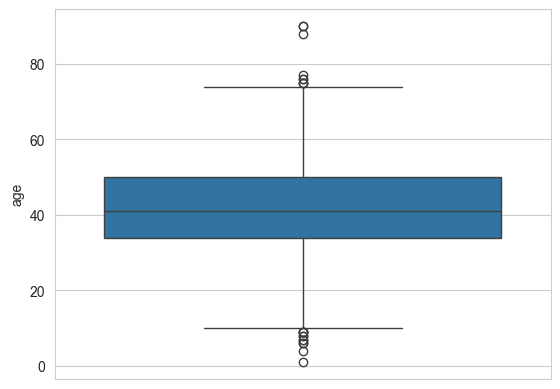

In [183]:
sns.boxplot(df['age'])

In [184]:
q1 ,  q3 = df['age'].quantile(0.25), df['age'].quantile(0.75)
iqr = q3-q1
bottom , top = q1 - 1.5 * iqr, q3 + 1.5 * iqr

In [185]:
df.loc[ ( df['age'] > top) | (df['age'] < bottom) , 'age'] = np.nan

In [186]:
df['age'].fillna(df['age'].median(), inplace=True)

In [187]:
df['age'].describe()

count    2460.000000
mean       41.972724
std        11.143235
min        10.000000
25%        35.000000
50%        41.000000
75%        49.000000
max        74.000000
Name: age, dtype: float64

<Axes: xlabel='age'>

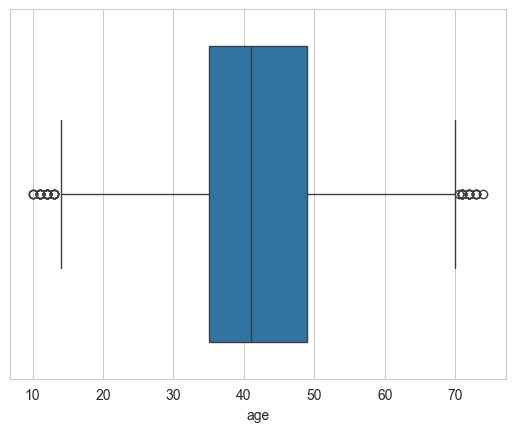

In [188]:
sns.boxplot(data=df, x="age")

### 8 - clean ` country` column
> tip : note that country column has country names with different writing ways 
  - use fuzzywuzzy to deal with this problem
  - you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [189]:
df['country'] = df['country'].str.strip().str.lower()

In [190]:
df['country'].unique()

array([nan, 'usa', 'us', 'canada', 'murica', 'united states', 'uk',
       'united kingdom', 'united staes', 'united states of america',
       'uae', 'england', 'mexico', 'u.s.a.', 'usausausa', 'america',
       'france', 'finland', 'unhinged states', 'us of a', 'unites states',
       'the united states', 'north carolina', 'unied states',
       'netherlands', 'germany', 'europe', 'earth', 'u s', 'u.s.', 'u.k.',
       'costa rica', 'the united states of america', 'unite states',
       'cascadia', 'australia', 'insanity lately', 'greece',
       'usa? hard to tell anymore..', "'merica", 'usas', 'pittsburgh',
       'united state', 'a', 'can', 'canae', 'new york', 'trumpistan',
       'ireland', 'united sates', 'korea', 'california', 'japan',
       'south africa',
       'i pretend to be from canada, but i am really from the united states.',
       'iceland', 'canada`', 'scotland', 'denmark', 'united stated',
       'switzerland', 'ahem....amerca', 'ud', 'south korea', 'new jersey',

In [191]:
exclude_keywords = ['ingdom', 'urope', 'stralia', 'South Korea', 'South africa', 'uk']

USA = df['country'].apply(lambda x: 'u' in str(x) and not any(keyword in str(x) for keyword in exclude_keywords))

df.loc[USA, 'country'] = 'usa'

df['country'] = df['country'].replace({'united kingdom' : 'uk', 'england' : 'uk', 'america' : 'usa'})


In [192]:
df['country'].unique()

array([nan, 'usa', 'canada', 'uk', 'mexico', 'france', 'finland',
       'north carolina', 'netherlands', 'germany', 'europe', 'earth',
       'costa rica', 'cascadia', 'australia', 'insanity lately', 'greece',
       "'merica", 'a', 'can', 'canae', 'new york', 'ireland', 'korea',
       'california', 'japan', 'iceland', 'canada`', 'scotland', 'denmark',
       'switzerland', 'ahem....amerca', 'new jersey', 'indonesia',
       'the netherlands', 'endland', 'atlantis', 'alaska', 'n. america',
       'singapore', 'china', 'taiwan', 'hong kong', 'spain', 'sweden',
       'narnia', "i don't know anymore", 'fear and loathing'],
      dtype=object)

In [193]:
df['country'].value_counts()

country
usa                     2048
canada                   224
uk                        33
germany                   10
australia                  7
netherlands                6
scotland                   5
japan                      5
mexico                     4
ireland                    4
france                     3
switzerland                3
china                      2
hong kong                  2
sweden                     2
denmark                    2
taiwan                     1
singapore                  1
n. america                 1
alaska                     1
atlantis                   1
endland                    1
the netherlands            1
spain                      1
indonesia                  1
narnia                     1
new jersey                 1
ahem....amerca             1
i don't know anymore       1
california                 1
canada`                    1
insanity lately            1
finland                    1
north carolina             1
europe

In [194]:
countries = ['usa', 'canada', 'uk', 'germany', 'amrica']

for query in countries :
    matches = process.extract(query, df['country'], limit=df.shape[0])
    for match in matches:
        if match[1] >= 80 :
            df.loc[df['country'] == match[0], 'country'] = query

In [195]:
df['country'].unique()

array([nan, 'usa', 'canada', 'uk', 'mexico', 'france', 'finland',
       'north carolina', 'netherlands', 'germany', 'europe', 'earth',
       'costa rica', 'cascadia', 'australia', 'insanity lately', 'greece',
       'amrica', 'canae', 'new york', 'ireland', 'korea', 'california',
       'japan', 'iceland', 'scotland', 'denmark', 'switzerland',
       'ahem....amerca', 'new jersey', 'indonesia', 'the netherlands',
       'endland', 'atlantis', 'alaska', 'n. america', 'singapore',
       'china', 'taiwan', 'hong kong', 'spain', 'sweden', 'narnia',
       "i don't know anymore", 'fear and loathing'], dtype=object)

In [196]:
df['country']=df['country'].replace(['north carolina','amrica','new york', 'new jersey','ahem....amerca'],'usa')
df['country'].value_counts()

country
usa                     2054
canada                   226
uk                        33
germany                   10
australia                  7
netherlands                6
scotland                   5
japan                      5
ireland                    4
mexico                     4
france                     3
switzerland                3
sweden                     2
hong kong                  2
china                      2
denmark                    2
spain                      1
taiwan                     1
endland                    1
singapore                  1
narnia                     1
n. america                 1
i don't know anymore       1
alaska                     1
atlantis                   1
europe                     1
the netherlands            1
indonesia                  1
earth                      1
iceland                    1
california                 1
korea                      1
canae                      1
greece                     1
insani

In [197]:
df.loc[~df['country'].isin(['usa', 'canada', 'uk', 'germany']), 'country'] = 'other'

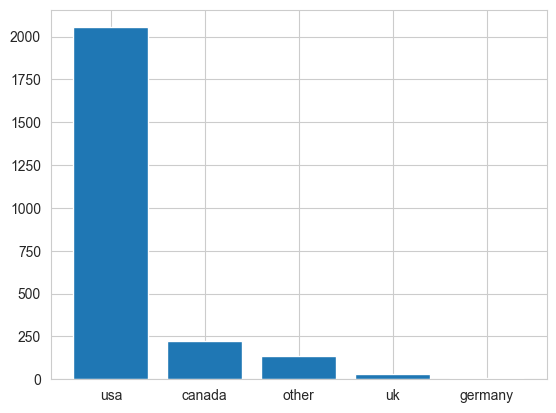

In [198]:
plt.bar(df['country'].value_counts().index, df['country'].value_counts().values,)
plt.show()

### 9 - clean ` area` column
> tip : area column has the same problem as country columns , but looking at all it's unique values may give us another way to deal with it rather than try to fix it

In [199]:
df['state'] = df['state'].str.strip().str.lower()

In [200]:
df['state'].value_counts()

state
california                                            171
ca                                                    128
ontario                                                79
illinois                                               72
texas                                                  71
oregon                                                 62
wa                                                     60
ny                                                     60
new york                                               55
pennsylvania                                           47
bc                                                     46
ma                                                     46
massachusetts                                          46
ohio                                                   46
washington                                             45
pa                                                     41
virginia                                               38
colorado

In [201]:
df.drop('state',axis = 'columns', inplace=True)

### 10 - clean ` Q6` columns
>- tip : Q6 has all kinds of chocolate bars and questions with three distinct options to choose from (Joy, Meh, Despair).
- so all the column that has Q6 is a candy name , so you should go through all these column and you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [202]:
data = df[df.filter(like='Q6').columns]
data.shape

(2460, 103)

In [203]:
df.drop(columns=[x for x in df.columns if 'Q6' in str(x)],inplace=True)

In [204]:
data.columns=data.columns.str.strip('Q6 | ') 

In [205]:
data.isna().sum()

100 Grand Bar                                                                         747
Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)     734
Any full-sized candy bar                                                              672
Black Jacks                                                                           958
Bonkers (the candy)                                                                   992
Bonkers (the board game)                                                             1006
Bottle Caps                                                                           765
Box'o'Raisins                                                                         688
Broken glow stick                                                                     706
Butterfinger                                                                          682
Cadbury Creme Eggs                                                                    683
Candy Corn

In [206]:
data.fillna("MEH",inplace=True)

In [210]:
chocola_data = data.describe().T

In [211]:
most_hated=chocola_data.sort_values(by=['top','freq'],ascending=[True,False]).head(10)

In [212]:
most_hated

,count,unique,top,freq
Broken glow stick,2460,3,DESPAIR,1625
Real Housewives of Orange County Season 9 Blue-Ray,2460,3,DESPAIR,1480
Gum from baseball cards,2460,3,DESPAIR,1462
White Bread,2460,3,DESPAIR,1455
Kale smoothie,2460,3,DESPAIR,1435
Dental paraphenalia,2460,3,DESPAIR,1433
Creepy Religious comics/Chick Tracts,2460,3,DESPAIR,1406
Candy that is clearly just the stuff given out for free at restaurants,2460,3,DESPAIR,1325
Whole Wheat anything,2460,3,DESPAIR,1289
Those odd marshmallow circus peanut things,2460,3,DESPAIR,1252


In [216]:
most_loved = chocola_data.loc[chocola_data['top'] == 'JOY'].sort_values(by = 'freq', ascending = False).head(10)

In [217]:
most_loved

,count,unique,top,freq
Any full-sized candy bar,2460,3,JOY,1559
Reese’s Peanut Butter Cups,2460,3,JOY,1498
Kit Kat,2460,3,JOY,1447
"Cash, or other forms of legal tender",2460,3,JOY,1439
Twix,2460,3,JOY,1413
Snickers,2460,3,JOY,1399
Tolberone something or other,2460,3,JOY,1320
Peanut M&M’s,2460,3,JOY,1291
Lindt Truffle,2460,3,JOY,1277
Nestle Crunch,2460,3,JOY,1188


### 11 - clean ` dress` column
>tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [218]:
df['dress'].value_counts()

dress
White and gold    1081
Blue and black     635
Name: count, dtype: int64

In [220]:
df['dress'].isna().sum()

744

In [221]:
df['dress'].fillna('Other', inplace=True)

<BarContainer object of 3 artists>

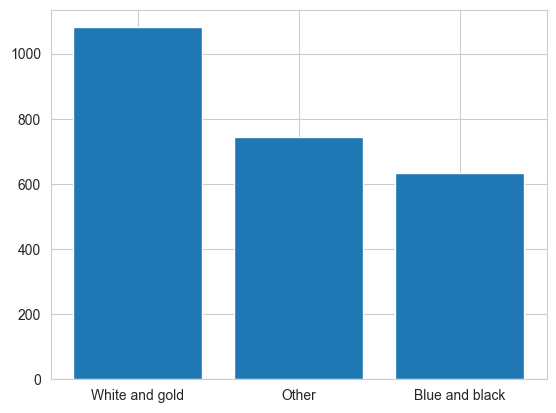

In [222]:
plt.bar(df['dress'].value_counts().index , df['dress'].value_counts().values)


### 12 - clean ` day` column
>tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [223]:
df['day'].isna().sum()

725

In [224]:
df['day'].fillna('Other',inplace=True)

<BarContainer object of 3 artists>

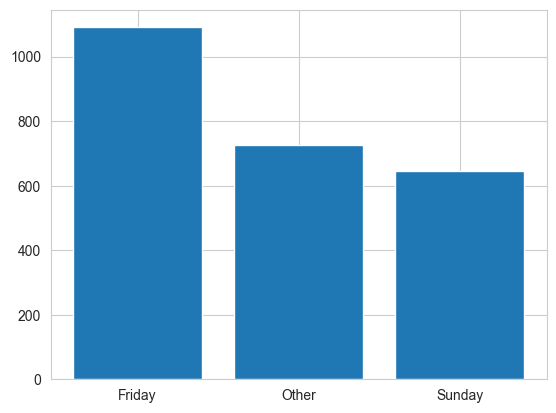

In [225]:
plt.bar(df['day'].value_counts().index , df['day'].value_counts().values)


### 13 - check
> after finish cleaning you should make sure your data is clean and that :
- there is no wrong data type
- there is no NaN values 
- all the column are cleaing and ready for the next step `EDA`

In [226]:
final_data = pd.concat([df, data], axis = 1)
final_data.sample(15)

,going out,gender,age,country,jpy other,despair other,dress,day,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy that is clearly just the stuff given out for free at restaurants,Caramellos,"Cash, or other forms of legal tender",Chardonnay,Chick-o-Sticks (we don’t know what that is),Chiclets,Coffee Crisp,Creepy Religious comics/Chick Tracts,Dental paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow sticks,Goo Goo Clusters,Good N' Plenty,Gum from baseball cards,Gummy Bears straight up,Hard Candy,Healthy Fruit,Heath Bar,Hershey's Dark Chocolate,Hershey’s Milk Chocolate,Hershey's Kisses,Hugs (actual physical hugs),Jolly Rancher (bad flavor),Jolly Ranchers (good flavor),JoyJoy (Mit Iodine!),Junior Mints,Senior Mints,Kale smoothie,Kinder Happy Hippo,Kit Kat,LaffyTaffy,LemonHeads,Licorice (not black),Licorice (yes black),Lindt Truffle,Lollipops,Mars,Maynards,Mike and Ike,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’s,Blue M&M's,Red M&M's,Green Party M&M's,Independent M&M's,Abstained from M&M'ing.,Minibags of chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'n'Laters,Peeps,Pencils,Pixy Stix,Real Housewives of Orange County Season 9 Blue-Ray,Reese’s Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Rolos,Sandwich-sized bags filled with BooBerry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids (i.e. abominations of nature),Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (a friend to diabetes),Take 5,Tic Tacs,Those odd marshmallow circus peanut things,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties
2148,No,Female,73.0,usa,NaN,NaN,Other,Other,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH
1201,Yes,Female,18.0,usa,NaN,NaN,Other,Other,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH,MEH
2000,No,Male,30.0,usa,People who understand your Halloween costume,NaN,Blue and black,Friday,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,MEH,MEH,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH
476,No,Female,51.0,usa,NaN,NaN,White and gold,Friday,JOY,JOY,MEH,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,

In [227]:
final_data.isna().sum()

going out                                                                               0
gender                                                                                  0
age                                                                                     0
country                                                                                 0
jpy other                                                                            1549
despair other                                                                        1743
dress                                                                                   0
day                                                                                     0
100 Grand Bar                                                                           0
Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)       0
Any full-sized candy bar                                                                0
Black Jack

In [229]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Columns: 111 entries, going out to York Peppermint Patties
dtypes: float64(1), object(110)
memory usage: 2.1+ MB


### 14 - write a summary about all the cleaning steps 

### Data Cleaning:
- Removed unnecessary columns such as `Internal ID`, `Unnamed: 113`, and survey-related columns from `Q7` to `Q12`, as well as `Click Coordinates (x,y)`.
- Renamed remaining columns for easier accessibility, except for `Q6`.
- The most common response for `Going Out` was `NO` after replacing missing values with the mode.
- In the `Gender` column, `Male` was the predominant gender among respondents.
- For `Age`, the most frequent age group was 35 to 50 years after filling in missing values with the median.
- In the `Country` column, the top three countries for survey participants were the `USA`, `Canada`, and `UK`, in that order.
- Decided to drop the `State` column due to the wide variety of unique values, making it challenging to identify the correct one.

### Q6 Analysis:
- Separated the `Q6` responses into a distinct dataframe for further analysis.

### Most Loved Candies:
The top 10 most popular candies included:
- 'Any full-sized candy bar'
- 'Reese’s Peanut Butter Cups'
- 'Kit Kat'
- 'Cash, or other forms of legal tender'
- 'Twix'
- 'Snickers'
- 'Tolberone something or other'
- 'Peanut M&M’s'
- 'Lindt Truffle'
- 'Nestle Crunch'

### Most Hated Candies:
The top 10 least liked candies included:
- 'Broken glow stick'
- 'Real Housewives of Orange County Season 9 Blue-Ray'
- 'Gum from baseball cards'
- 'White Bread'
- 'Kale smoothie'
- 'Dental paraphernalia'
- 'Creepy Religious comics/Chick Tracts'
- 'Candy given out for free at restaurants'
- 'Whole Wheat anything'
- 'Odd marshmallow circus peanuts'

### Additional Insights:
- In the `Dress` column, the most frequent response was `white and gold`, followed by `Others`, and then `black and blue`.
- `Friday` was the most preferred day of the week according to the survey.
